### Lista de exercício 3

Um sinal de eletromiografia foi gravado em um exame de Potencial evocado motor (MEP) por estimulação magnética transcraniana. Porém, o mestrando descuidado perdeu os sinais de trigger. Quando se deu conta, entrou em desespero pensando que tinha perdido sua dissertação, pois não tinha mais como recrutar os voluntários novamente. Quando o estudante foi dar a má notícia ao seu orientador, ele disse que ainda havia um jeito de salvar os dados. Como conheciam a forma de onda do MEP, era só convoluí-la no sinal e abrir janelas em torno dos pontos de máximo. O estudante ficou aliviado depois dessa conversa, mas não teve coragem de perguntar como faria a tal da convolução, então resolver pedir ajuda a um de seus colegas:

-- Caro coleguinha, o meu sinal está no Arquivo mep.txt, por favor, você poderia me ajudar a salvar minha dissertação?


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def plot_signal(signal, title=''):
    t = np.arange(0, len(signal)/fs, 1/fs)
    t = t*1000  # ms
    plt.figure(figsize=(15, 3))
    limit = max(max(signal)*1.1, abs(min(signal)*1.1))
    limit = 1 if limit < 1 else limit
    plt.ylim(top=limit, bottom=-limit)
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude (mV)')
    plt.title(title)
    plt.plot(t, signal, scaley=False)

with open('mep.txt') as f:
    raw_data = f.readlines()

raw_data = [rd for rd in raw_data if rd]

data = []
for line in raw_data:
    data.append([float(l) for l in line.split()])

fs = 4000

# Filtering empty lines and transforming to np array
data = np.array([d for d in data if d])

signal = data[150:, 0]
trigger = data[150:,1]*100

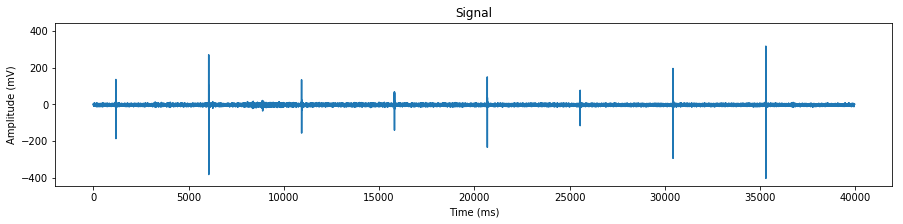

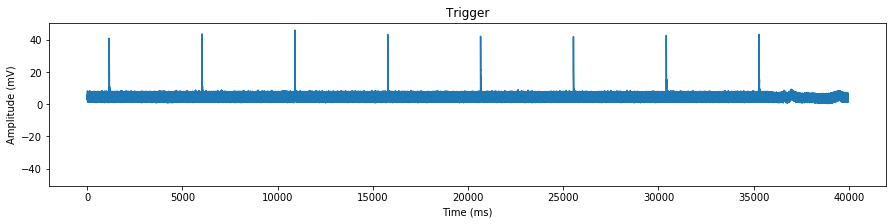

In [2]:
plot_signal(signal, 'Signal')
plot_signal(trigger, 'Trigger')

In [3]:
peaks = find_peaks(trigger, height=37)
peaks = peaks[0]
peaks

array([  4607,  24113,  43619,  63125,  82631, 102137, 121643, 141149])

In [4]:
window_time_ms = 80
window_size = (fs//1000)*window_time_ms

windowed_signals = np.array([signal[p:p+window_size] for p in peaks])

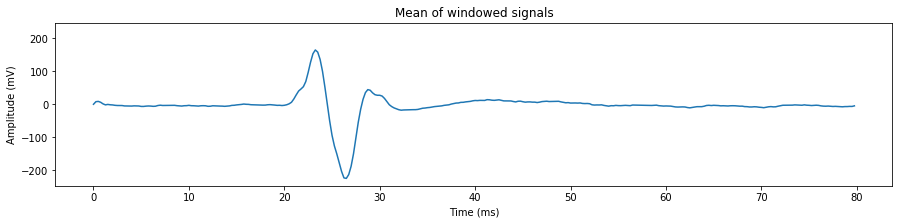

In [5]:
# Aplying mean filter
filtered_signal = sum(windowed_signals)/len(peaks)
plot_signal(filtered_signal, 'Mean of windowed signals')

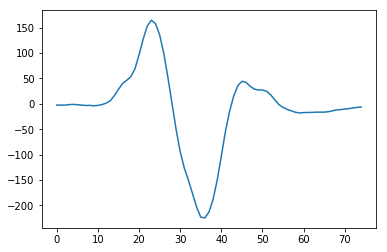

In [6]:
signal_peak = filtered_signal[70:145]
plt.plot(signal_peak)

In [7]:
convolved_signal = np.convolve(signal, filtered_signal)

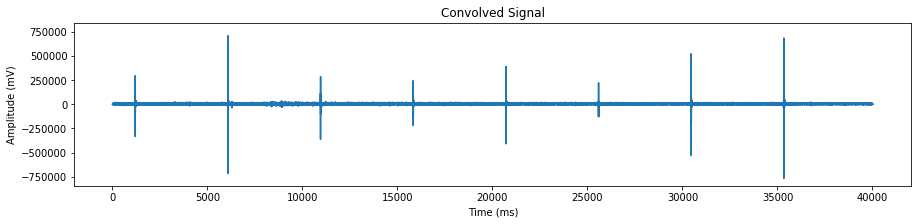

In [8]:
plot_signal(convolved_signal, 'Convolved Signal')

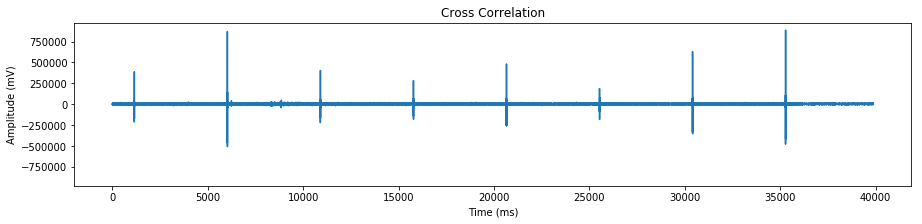

In [9]:
cross_correlation = np.correlate(signal, filtered_signal)
plot_signal(cross_correlation, 'Cross Correlation')